In this notebook, I:
- made countsplot of the pits data collected at 2020 and 2021 for all sites.
- plot the dates of all uavsar and pits for 2020 and 2021 campaign
- write a function for plotting dates of pits and uavsar at specific site
- write function for extracting uavsar values at all polarization for a specified date and uavsar

## setup

In [2]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import datetime
import seaborn as sns
import os
import rasterio as rio
import geopandas as gpd
import datetime
import xarray as xr
import rioxarray #for raster data
import rasterstats as rs

/home/naheemadebisi/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
pits_2020= pd.read_csv('/home/naheemadebisi/PhD/snow-analytics/Radar-Backscatter/pits_data/2020/SNEX20_TS_SP_preliminary_v6/SNEX20_TS_SP_Summary_SWE_v01.csv')
pits_2020['Date'] = pd.to_datetime(pits_2020['Date/Local Standard Time'], format='%Y-%m-%d').dt.round('D')
pits_2021= pd.read_csv('/home/naheemadebisi/PhD/snow-analytics/Radar-Backscatter/pits_data/2021/SNEX21_TS_SP_preliminary_v1/SNEX21_TS_SP_Summary_SWE_v01.csv')
pits_2021['Date'] = pd.to_datetime(pits_2021['Date/Local Standard Time'], format='%Y-%m-%d').dt.round('D')
pits_2020_2021= pd.read_csv('/home/naheemadebisi/PhD/snow-analytics/Radar-Backscatter/pits_data/SNEX20_21_Summary_SWE.csv')

In [4]:
print(f'there are {pits_2020.Location.value_counts().sum()} pits in 2020')
print(f'there are {pits_2021.Location.value_counts().sum()} pits in 2021')
print(f'there are {pits_2020_2021.Location.value_counts().sum()} total pits in 2020 and 2021')

there are 451 pits in 2020
there are 243 pits in 2021
there are 694 total pits in 2020 and 2021


In [4]:
pits_2020_count = pd.DataFrame(pits_2020['Location'].value_counts()).rename(columns={'Location' : '2020'})
pits_2021_count = pd.DataFrame(pits_2021['Location'].value_counts()).rename(columns={'Location' : '2021'})
pits_20202021_counts= pd.concat([pits_2020_count,pits_2021_count], axis = 1).sort_values(by = ['2020', '2021'], ascending = False, kind = 'stable')
pits_20202021_counts

,2020,2021
East River,111.0,NaN
Grand Mesa,76.0,1.0
Niwot Ridge,66.0,NaN
Fraser Experimental Forest,51.0,101.0
Boise River Basin,47.0,71.0
Sagehen Creek,20.0,NaN
Cameron Pass,16.0,30.0
Mammoth Lakes,15.0,NaN
Jemez River,15.0,NaN
Little Cottonwood Canyon,14.0,23.0


## Countplot of pits data for 2020 and 2021

Text(0.5, 1.0, 'Distribution of 694 pits data from 2020 and 2021 SNOWEX across sites')

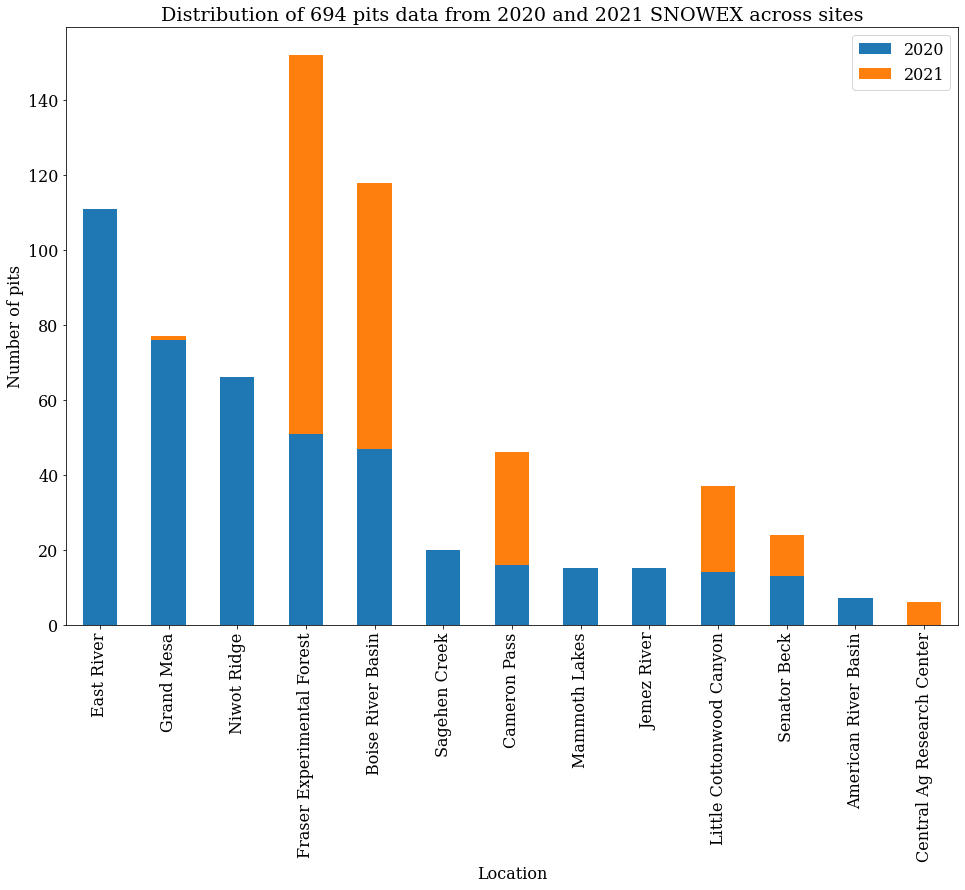

In [9]:
# Set font size and font family of matplotlib for plotting
plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(16,11))

# (pits_data['Location'].value_counts()).plot(kind = 'bar')
pits_20202021_counts.plot.bar(stacked=True, ax = ax)
ax.set_xlabel("Location")
ax.set_ylabel("Number of pits")
ax.set_title('Distribution of 694 pits data from 2020 and 2021 SNOWEX across sites')

## Plot all 2021 pits data SD in 2020

/home/naheemadebisi/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


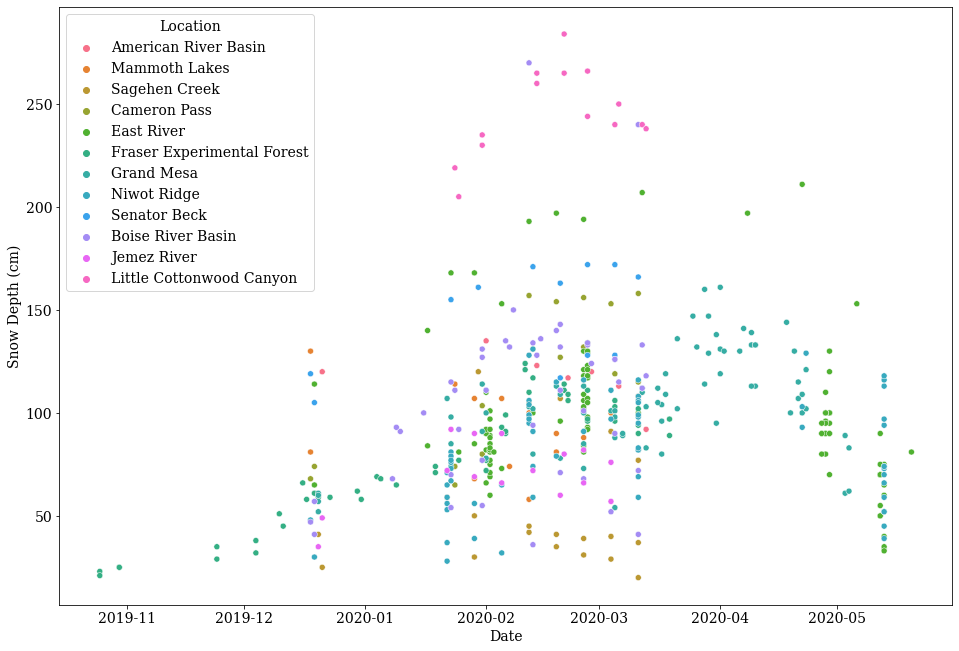

In [5]:
# Set font size and font family of matplotlib for plotting
plt.rcParams.update({'font.size': 14})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(16,11))
sns.scatterplot('Date', 'Snow Depth (cm)', data=pits_2020, hue='Location')

plt.show()

## Plot all 2021 pits data SD in 2021

/home/naheemadebisi/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


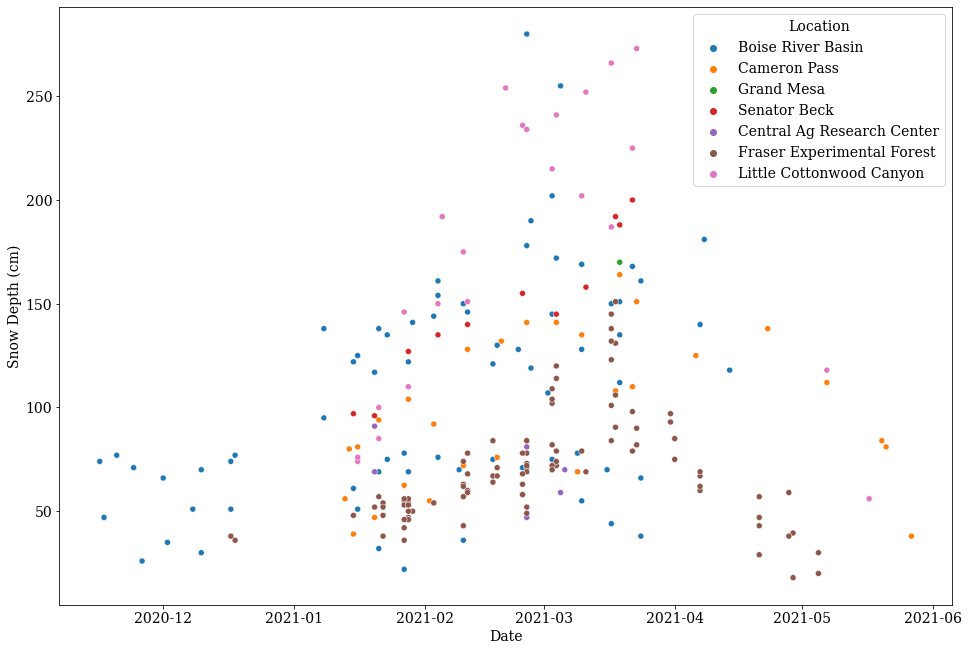

In [6]:
# Set font size and font family of matplotlib for plotting
plt.rcParams.update({'font.size': 14})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(16,11))
sns.scatterplot('Date', 'Snow Depth (cm)', data=pits_2021, hue='Location')

plt.show()

## Pits and UAVSAR dates at a specific site

| Site Location | Campaign Name | Image Pairs |
| - | - | - |
| Grand Mesa | Grand Mesa, CO | 13 |
| Boise River Basin | Lowman, CO | 17 |
| Frazier Experimental Forest | Fraser, CO | 16 |
| Senator Beck Basin | Ironton, CO | 9 | 
| East River | Peeler Peak, CO | 4 |
| Cameron Pass | Rocky Mountains NP, CO | 15 |
| Reynold Creek | Silver City, ID | 1 |
| Central Agricultral Research Center | Utica, MT | 2 |
| Little Cottonwood Canyon | Salt Lake City, UT | 21 |
| Jemez River | Los Alamos, NM | 3 |
| American River Basin | Eldorado National Forest, CA | 4 |
| Sagehen Creek | Donner Memorial State Park, CA | 4 |
| Lakes Basin | Sierra National Forest, CA | 3 |

In [18]:
#dates of uavsar flights
#2020
dates_2020 = {'Jemez River' : ['2020-02-12', '2020-02-19', '2020-02-26'],
         'Sagehen Creek' : ['2019-12-20', '2020-01-31', '2020-02-12', '2020-02-19', '2020-02-26', '2020-03-11'],
         'American River Basin' : ['2020-01-31', '2020-01-31', '2020-02-12', '2020-02-19', '2020-02-26', '2020-03-11'],
         'Fraser Experimental Forest' : ['2020-02-12', '2020-02-19', '2020-02-26', '2020-03-12'],
         'Grand Mesa' : ['2020-02-01', '2020-02-12', '2020-02-19', '2020-02-26', '2020-03-12'],
         'Senator Beck' : ['2020-02-12', '2020-02-19', '2020-02-26', '2020-03-12'], # problematic
         'Boise River Basin' : ['2019-12-20', '2020-01-31', '2020-02-13', '2020-02-21', '2020-03-11'],
         'East River' : ['2019-12-20', '2020-02-12', '2020-02-19', '2020-02-26', '2020-03-12'],
         'Cameron Pass' : ['2020-02-01', '2020-02-12', '2020-02-19', '2020-02-26', '2020-03-12'],
         'Lakes Basin' : ['2020-01-31', '2020-02-12', '2020-02-19', '2020-02-26', '2020-03-11'],
         'Reynold Creek' : ['2020-01-31', '2020-02-13', '2020-02-21', '2020-03-11'],
         'Little Cottonwood Canyon' : ['2020-01-31', '2020-02-13', '2020-02-21', '2020-03-12']

         }

#2021
dates_2021 = {'Fraser Experimental Forest' : ['2021-01-15', '2021-01-20', '2021-01-27', '2021-02-03', '2021-02-23', '2021-03-03', '2021-03-10', '2021-03-16', '2021-03-22'],
         'Grand Mesa' : ['2021-01-27', '2021-02-03', '2021-02-10', '2021-03-03', '2021-03-10', '2021-03-16', '2021-03-22'],
         'Senator Beck' : ['2021-01-15', '2021-01-21', '2021-01-28', '2021-02-04', '2021-02-11', '2021-02-23', '2021-03-03', '2021-03-10', '2021-03-16', '2021-03-22'],
         'Boise River Basin' : ['2021-01-15', '2021-01-20', '2021-01-27', '2021-02-03', '2021-02-10', '2021-02-23', '2021-03-03', '2021-03-10', '2021-03-16', '2021-03-22'],
         'Central Ag Research Center' : ['2021-01-15', '2021-01-20', '2021-02-23'],
         'Cameron Pass' : ['2021-01-15', '2021-01-20', '2021-01-27', '2021-02-03', '2021-02-23', '2021-03-03', '2021-03-10', '2021-03-16', '2021-03-22'],
         'Little Cottonwood Canyon' : ['2021-01-15', '2021-01-21', '2021-01-28', '2021-02-03', '2021-02-10', '2021-02-23', '2021-03-03', '2021-03-16', '2021-03-22']
         }

In [19]:
def plot_pit_uavsar_flight(df, location, flightdates):
    # Set font size and font family of matplotlib for plotting
    plt.rcParams.update({'font.size': 14})
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

    #create a figure and axes elements
    fig, ax = plt.subplots(figsize=(16,11))
    sns.scatterplot('Date', 'Snow Depth (cm)', data=df[df['Location']== location])
    for dates in [pd.to_datetime(i) for i in flightdates[location]]:
        
        ax.axvline(dates, color='k', linestyle='--')
    if flightdates == dates_2020:
        year = '2020'
    elif flightdates == dates_2021:
        year = '2021'
    ax.set_title('Pits and uavsar at ' +  location + ' in ' + year)
    plt.savefig(location + '.png')
    plt.show()  

/home/naheemadebisi/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


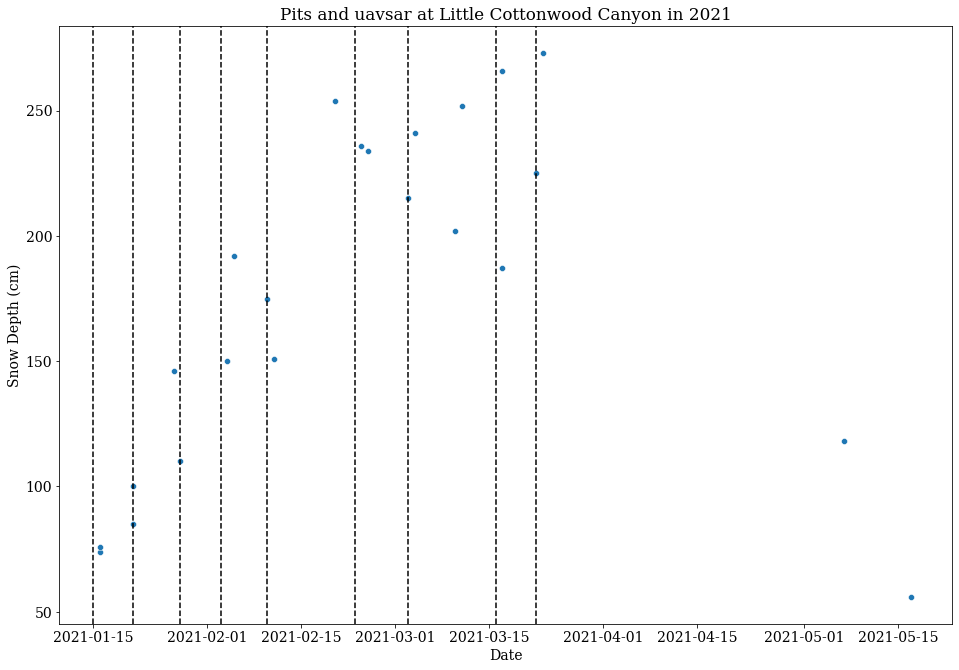

In [24]:
plot_pit_uavsar_flight(pits_2021, 'Little Cottonwood Canyon', dates_2021)

In [39]:
# # Set font size and font family of matplotlib for plotting
# plt.rcParams.update({'font.size': 14})
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# #create a figure and axes elements
# fig, ax = plt.subplots(figsize=(16,11))
# sns.scatterplot('Date', 'Snow Depth (cm)', data=pits_2020[pits_2020['Location']== 'Fraser Experimental Forest'])
# for dates in [pd.to_datetime(i) for i in dates_2020['Fraser Experimental Forest']]:
    
#     ax.axvline(dates, color='k', linestyle='--')
# # ax.legend()
# ax.set_title('Pits and uavsar at Fraser Experimental Forest')

# plt.show()

## Function for extracting raster valuesat all polarization for specific flight date

- select pits data acquired within a buffered period of uavsar flight date over a location
- extract raster values of a uavsar flight at four polarization
- merge the df to an exisiting data frame and save

In [ ]:
# def select_points(df, date, location, buffer = 3):
#     """select pits acquired within specified buffered period of a date and site location

#     Args:
#         df (string): path to csv
#         date (string): date of uavsar flight
#         location (string): pits site name
#         buffer (int, optional): The buffered period. Defaults to 3.

#     Returns:
#         _type_: _description_
#     """

#     #mask with date buffer and location
#     mask = ((df['Date'] >= datetime.datetime.strptime(date, '%Y-%m-%d') -  datetime.timedelta(days=buffer)) & (df['Date'] <= datetime.datetime.strptime(date, '%Y-%m-%d') +  datetime.timedelta(days=buffer)) & (df['Location'] == location))
#     selected_df = pits_2020.loc[mask]
#     #calculate the temporal separation between pits and uavsar flight
#     selected_df['period_flag'] = (datetime.datetime.strptime(date, '%Y-%m-%d') - selected_df['Date']).dt.days
#     geodf = gpd.GeoDataFrame(selected_df, geometry = gpd.points_from_xy(selected_df['Longitude (deg)'], selected_df['Latitude (deg)']), crs="EPSG:4326")
#     return geodf

In [16]:
def extract_uavsar(uavsar_dir, df, date, location, pair = 'first', buffer = 3):
    """excatract uavsar value 

    Args:
        uavsar_dir (string): path to the directory containing the uavsar files for an acquisition date 
        df (string): path to csv of the appropriate pits records
        date (string): date of uavsar flight
        location (string): pits site name
        pair (str, optional): Appropriate pair (amp1 or amp2) to use. This depends on the uavsar date. Mostly use the first pair so defaults to 'first' but the last date would be 'second'.
        buffer (int, optional): The buffered period. Defaults to 3.

    Returns:
        _type_: _description_
    """
    #cahnge the working directory
    os.chdir(uavsar_dir)
    if pair == "first":
        img = 'amp1.grd.tiff'
    else:
        img = 'amp2.grd.tiff'

    files = sorted([file for file in os.listdir(uavsar_dir) if file.endswith(img)])
    print(files)
    #pits_point = select_points(df, date, location)
    mask = ((df['Date'] >= datetime.datetime.strptime(date, '%Y-%m-%d') -  datetime.timedelta(days=buffer)) & (df['Date'] <= datetime.datetime.strptime(date, '%Y-%m-%d') +  datetime.timedelta(days=buffer)) & (df['Location'] == location))
    selected_df = pits_2020.loc[mask]
    #calculate the temporal separation between pits and uavsar flight
    selected_df['period_flag'] = (datetime.datetime.strptime(date, '%Y-%m-%d') - selected_df['Date']).dt.days
    pits_point = gpd.GeoDataFrame(selected_df, geometry = gpd.points_from_xy(selected_df['Longitude (deg)'], selected_df['Latitude (deg)']), crs="EPSG:4326")


    for file in files:
        ##HH will be the first file so extract it
        if 'HH' in file:
            print(f"Extracting values for {file}")
            #extract pixels
            data = rs.point_query(pits_point, file, geojson_out = True, interpolate = 'nearest')
            # turn to geodataframe
            uavsar_pit_df = gpd.GeoDataFrame.from_features(data)
            #rename dataframe column
            uavsar_pit_df.rename(columns= {'value' : 'HH'}, inplace = True)

        if 'HV' in file:
            print(f"Extracting values for {file}")
            #extract pixel values
            data = rs.point_query(uavsar_pit_df, file, geojson_out = True, interpolate = 'nearest')
            # turn to geodataframe
            uavsar_pit_df = gpd.GeoDataFrame.from_features(data)
            #rename dataframe column
            uavsar_pit_df.rename(columns= {'value' : 'HV'}, inplace = True)

        if 'VH' in file:
            print(f"Extracting values for {file}")
            #extract pixel values
            data = rs.point_query(uavsar_pit_df, file, geojson_out = True, interpolate = 'nearest')
            # turn to geodataframe
            uavsar_pit_df = gpd.GeoDataFrame.from_features(data)
            #rename dataframe column
            uavsar_pit_df.rename(columns= {'value' : 'VH'}, inplace = True)
            
        if 'VV' in file:
            print(f"Extracting values for {file}")
            #extract pixel values
            data = rs.point_query(uavsar_pit_df, file, geojson_out = True, interpolate = 'nearest')
            # turn to geodataframe
            uavsar_pit_df = gpd.GeoDataFrame.from_features(data)
            #rename dataframe column
            uavsar_pit_df.rename(columns= {'value' : 'VV'}, inplace = True)

    #save to csv
    uavsar_pit_df.to_csv(date + '.csv')
    return uavsar_pit_df

In [18]:
extract_uavsar('/home/naheemadebisi/PhD/snow-analytics/Radar-Backscatter/UAVSAR/Dorado/dorado_2020/dorado_34017_20014-002_20016-000_0014d_s01_L090_01_amp_grd/uavsar_20200226',
               pits_2020, '2020-03-11', 'American River Basin')

['dorado_26-Feb-2020_11-Mar-2020_L090HH_01.amp2.grd.tiff', 'dorado_26-Feb-2020_11-Mar-2020_L090HV_01.amp2.grd.tiff', 'dorado_26-Feb-2020_11-Mar-2020_L090VH_01.amp2.grd.tiff', 'dorado_26-Feb-2020_11-Mar-2020_L090VV_01.amp2.grd.tiff']
Extracting values for dorado_26-Feb-2020_11-Mar-2020_L090HH_01.amp2.grd.tiff
Extracting values for dorado_26-Feb-2020_11-Mar-2020_L090HV_01.amp2.grd.tiff
Extracting values for dorado_26-Feb-2020_11-Mar-2020_L090VH_01.amp2.grd.tiff
Extracting values for dorado_26-Feb-2020_11-Mar-2020_L090VV_01.amp2.grd.tiff


/tmp/ipykernel_607653/4257247866.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['period_flag'] = (datetime.datetime.strptime(date, '%Y-%m-%d') - selected_df['Date']).dt.days
/home/naheemadebisi/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/home/naheemadebisi/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/home/naheemadebisi/miniconda3/envs/earth-analytics-python/lib/python3.8/site-pa

,geometry,Location,Site,PitID,Date/Local Standard Time,UTM Zone,Easting (m),Northing (m),Latitude (deg),Longitude (deg),...,SWE A (mm),SWE B (mm),SWE (mm),Snow Depth (cm),Date,period_flag,HH,HV,VH,VV
0,POINT (-120.04190 38.71024),American River Basin,Caples Lake,CAAMCL_20200313_1030,2020-03-13T10:30,10N,757214,4288777,38.71024,-120.0419,...,425,424,424.5,92.0,2020-03-13,-2,0.280591,0.092052,0.094611,0.20046
